### Data Cleaning

In [78]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy import arange

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from scipy import stats
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

####Load Dataset

In [79]:
url = 'https://raw.githubusercontent.com/k4ilham/Tugas-Paper-Kelompok-3---Software-Engineering/main/dataset_codefactor.csv'
df = pd.read_csv(url, encoding='latin1')

In [80]:
df.shape

(30, 34)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Project Name     30 non-null     object 
 1   Web Url          30 non-null     object 
 2   Years            30 non-null     int64  
 3   Languages        30 non-null     object 
 4   GPA              30 non-null     object 
 5   Pull Request     30 non-null     int64  
 6   Files            30 non-null     object 
 7   Active Branch    30 non-null     int64  
 8   Total Issues     30 non-null     int64  
 9   C++              11 non-null     float64
 10  C                5 non-null      float64
 11  C#               1 non-null      float64
 12  Python           21 non-null     float64
 13  Shell            11 non-null     float64
 14  Powershell       1 non-null      float64
 15  YAML             0 non-null      float64
 16  R                0 non-null      float64
 17  CSS              6

In [82]:
####Show top 5 Data

In [83]:
df.head(5)

,Project Name,Web Url,Years,Languages,GPA,Pull Request,Files,Active Branch,Total Issues,C++,...,JS,CSS.1,HTML,Ruby,Go,Complexcity,Style,Performance,Maintainability,Security
0,pytorch / vision,Releases · pytorch/vision (github.com),2023,Python,A,199,510,1,109,10.0,...,NaN,NaN,NaN,NaN,NaN,68.0,3.0,1.0,13.0,24.0
1,opencv,opencv/opencv: Open Source Computer Vision Lib...,2013,C++,A-,116,"4,593",1,8245,5524.0,...,727.0,4.0,NaN,NaN,NaN,2641.0,3744.0,2.0,1705.0,153.0
2,mmcv,open-mmlab/mmcv: OpenMMLab Computer Vision Fou...,2020,Python,A,98,827,1,62,18.0,...,NaN,NaN,NaN,NaN,NaN,41.0,2.0,NaN,6.0,13.0
3,AliceVision,alicevision/AliceVision: Photogrammetric Compu...,2018,C++,A,27,938,1,278,257.0,...,NaN,NaN,NaN,NaN,NaN,229.0,43.0,NaN,3.0,3.0
4,computervision-recipes,microsoft/computervision-recipes: Best Practic...,2019,Jupyter Notebook,A,5,210,1,95,4.0,...,NaN,NaN,2.0,NaN,NaN,10.0,4.0,NaN,55.0,26.0


#### Remove Collumn

In [84]:
# Menghapus fitur "Project Name" dan "Grade" dari DataFrame
df.drop(['Project Name','Web Url', 'Years','Languages','GPA','Files'], axis=1, inplace=True)

#### Rename Null Value to 0

In [85]:
df.fillna(0, inplace=True)

In [86]:
df.head(5)

,Pull Request,Active Branch,Total Issues,C++,C,C#,Python,Shell,Powershell,YAML,...,JS,CSS.1,HTML,Ruby,Go,Complexcity,Style,Performance,Maintainability,Security
0,199,1,109,10.0,0.0,0.0,84.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,68.0,3.0,1.0,13.0,24.0
1,116,1,8245,5524.0,610.0,12.0,964.0,6.0,5.0,0.0,...,727.0,4.0,0.0,0.0,0.0,2641.0,3744.0,2.0,1705.0,153.0
2,98,1,62,18.0,0.0,0.0,38.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,41.0,2.0,0.0,6.0,13.0
3,27,1,278,257.0,16.0,0.0,3.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,229.0,43.0,0.0,3.0,3.0
4,5,1,95,4.0,0.0,0.0,81.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,10.0,4.0,0.0,55.0,26.0


In [87]:
#### Identify Columns That Null Value and Remove Null Value

In [88]:
# Check for null values in the entire dataset
null_counts = df.isnull().sum()

# Display columns with null values and their counts
print("Columns with null values:")
print(null_counts[null_counts > 0])

if len(null_counts[null_counts > 0]) != 0 :
  # Remove rows with any null values
  df = df.dropna()

Columns with null values:
Series([], dtype: int64)


In [89]:
df.groupby('Style').describe()

Pull Request                                                        \
              count   mean        std    min    25%    50%     75%    max   
Style                                                                       
0.0            16.0   12.0  11.087531    0.0    3.5    9.5   16.75   37.0   
2.0             1.0   98.0        NaN   98.0   98.0   98.0   98.00   98.0   
3.0             1.0  199.0        NaN  199.0  199.0  199.0  199.00  199.0   
4.0             1.0    5.0        NaN    5.0    5.0    5.0    5.00    5.0   
7.0             1.0    4.0        NaN    4.0    4.0    4.0    4.00    4.0   
9.0             1.0   20.0        NaN   20.0   20.0   20.0   20.00   20.0   
12.0            1.0   29.0        NaN   29.0   29.0   29.0   29.00   29.0   
43.0            1.0   27.0        NaN   27.0   27.0   27.0   27.00   27.0   
104.0           1.0   16.0        NaN   16.0   16.0   16.0   16.00   16.0   
110.0           1.0    2.0        NaN    2.0    2.0    2.0    2.00    2.0   
304.0           1.0    0.0        NaN    0.0    0.0    0.0    0.00    0.0   
394.0           1.0   31.0        NaN   31.0   31.0   31.0   31.00   31.0   
445.0           1.0  104.0        NaN  104.0  104.0  104.0  104.00  104.0   
1749.0          1.0   71.0        NaN   71.0   71.0   71.0   71.00   71.0   
3744.0          1.0  116.0        NaN  116.0  116.0  116.0  116.00  116.0   

       Active Branch       ... Maintainability         Security            \
               count mean  ...             75%     max    count      mean   
Style                      ...                                              
0.0             16.0  1.0  ...           51.75  2213.0     16.0    4.9375   
2.0              1.0  1.0  ...            6.00     6.0      1.0   13.0000   
3.0              1.0  1.0  ...           13.00    13.0      1.0   24.0000   
4.0              1.0  1.0  ...           55.00    55.0      1.0   26.0000   
7.0              1.0  1.0  ...          146.00   146.0      1.0   49.0000   
9.0              1.0  1.0  ...           72.00    72.0      1.0    0.0000   
12.0             1.0  1.0  ...          120.00   120.0      1.0    3.0000   
43.0             1.0  1.0  ...            3.00     3.0      1.0    3.0000   
104.0            1.0  1.0  ...           30.00    30.0      1.0   19.0000   
110.0            1.0  1.0  ...           12.00    12.0      1.0   33.0000   
304.0            1.0  1.0  ...           44.00    44.0      1.0    4.0000   
394.0            1.0  2.0  ...            5.00     5.0      1.0    0.0000   
445.0            1.0  1.0  ...         4147.00  4147.0      1.0    6.0000   
1749.0           1.0  1.0  ...         6093.00  6093.0      1.0  116.0000   
3744.0           1.0  1.0  ...         1705.00  1705.0      1.0  153.0000   

                                                      
             std    min    25%    50%     75%    max  
Style                                                 
0.0     6.495832    0.0    0.0    2.5    8.25   24.0  
2.0          NaN   13.0   13.0   13.0   13.00   13.0  
3.0          NaN   24.0   24.0   24.0   24.00   24.0  
4.0          NaN   26.0   26.0   26.0   26.00   26.0  
7.0          NaN   49.0   49.0   49.0   49.00   49.0  
9.0          NaN    0.0    0.0    0.0    0.00    0.0  
12.0         NaN    3.0    3.0    3.0    3.00    3.0  
43.0         NaN    3.0    3.0    3.0    3.00    3.0  
104.0        NaN   19.0   19.0   19.0   19.00   19.0  
110.0        NaN   33.0   33.0   33.0   33.00   33.0  
304.0        NaN    4.0    4.0    4.0    4.00    4.0  
394.0        NaN    0.0    0.0    0.0    0.00    0.0  
445.0        NaN    6.0    6.0    6.0    6.00    6.0  
1749.0       NaN  116.0  116.0  116.0  116.00  116.0  
3744.0       NaN  153.0  153.0  153.0  153.00  153.0  

[15 rows x 216 columns]

 #### Delete Columns That Contain a Single Value

In [90]:
df.nunique()

Pull Request       24
Active Branch       2
Total Issues       30
C++                11
C                   6
C#                  2
Python             21
Shell               7
Powershell          2
YAML                1
R                   1
CSS                 6
Dockerfile          6
PHP                 1
Javascript          2
Java                5
Kotlin              1
Swift               2
JS                  5
CSS.1               6
HTML                2
Ruby                2
Go                  3
Complexcity        25
Style              15
Performance         4
Maintainability    28
Security           17
dtype: int64

 #### Identify Columns That Contain a Single Value

#### Identify Rows That Contain Duplicate Data and Delete Rows

In [91]:
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])
if dups.any() == True:
  df.drop_duplicates(inplace=True)
  print(df.shape)

False
Empty DataFrame
Columns: [Pull Request, Active Branch, Total Issues, C++, C, C#, Python, Shell, Powershell, YAML, R, CSS, Dockerfile, PHP, Javascript, Java, Kotlin, Swift, JS, CSS.1, HTML, Ruby, Go, Complexcity, Style, Performance, Maintainability, Security]
Index: []

[0 rows x 28 columns]


#### Move Code Style To END Data Frame

In [92]:
# Pindahkan kolom "Code Style" ke paling akhir
code_style_column = df.pop('Style')
df['Style'] = code_style_column

# Dapatkan nilai dari DataFrame
dataset = df.values

# Mengambil kolom "Code Style" (yang sekarang berada di posisi terakhir) sebagai fitur utama
X = dataset[:, -1].reshape(-1, 1)  # Menggunakan reshape untuk memastikan array memiliki bentuk yang benar


#### Make Target Code Style Rank

In [93]:
boundaries = [0, 100, 1000, 5000, 1000000]
labels = ['A', 'B', 'C', 'D']

# Buat kolom baru untuk menyimpan peringkat
df['Code Style Rank'] = pd.cut(df['Style'], bins=boundaries, labels=labels, right=False)

# Ubah tipe data kolom 'Code Style Rank' menjadi kategori
df['Code Style Rank'] = df['Code Style Rank'].astype('category')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Pull Request     30 non-null     int64   
 1   Active Branch    30 non-null     int64   
 2   Total Issues     30 non-null     int64   
 3   C++              30 non-null     float64 
 4   C                30 non-null     float64 
 5   C#               30 non-null     float64 
 6   Python           30 non-null     float64 
 7   Shell            30 non-null     float64 
 8   Powershell       30 non-null     float64 
 9   YAML             30 non-null     float64 
 10  R                30 non-null     float64 
 11  CSS              30 non-null     float64 
 12  Dockerfile       30 non-null     float64 
 13  PHP              30 non-null     float64 
 14  Javascript       30 non-null     float64 
 15  Java             30 non-null     float64 
 16  Kotlin           30 non-null     float64 
 17 

In [95]:
df.head(50)

,Pull Request,Active Branch,Total Issues,C++,C,C#,Python,Shell,Powershell,YAML,...,CSS.1,HTML,Ruby,Go,Complexcity,Performance,Maintainability,Security,Style,Code Style Rank
0,199,1,109,10.0,0.0,0.0,84.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,68.0,1.0,13.0,24.0,3.0,A
1,116,1,8245,5524.0,610.0,12.0,964.0,6.0,5.0,0.0,...,4.0,0.0,0.0,0.0,2641.0,2.0,1705.0,153.0,3744.0,C
2,98,1,62,18.0,0.0,0.0,38.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,41.0,0.0,6.0,13.0,2.0,A
3,27,1,278,257.0,16.0,0.0,3.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,229.0,0.0,3.0,3.0,43.0,A
4,5,1,95,4.0,0.0,0.0,81.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,10.0,0.0,55.0,26.0,4.0,A
5,16,1,558,126.0,391.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,14.0,0.0,405.0,0.0,30.0,19.0,104.0,B
6,0,1,77,0.0,0.0,0.0,74.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,72.0,1.0,0.0,A
7,37,1,33,0.0,0.0,0.0,26.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,26.0,0.0,7.0,0.0,0.0,A
8,30,1,8,0.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,A
9,24,1,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,38.0,0.0,0.0,A


####Consider Columns That Have Very Few Values

In [96]:
# summarize the number of unique values in each column
for i in range(df.shape[1]):
  num = len(df.iloc[:, i].unique())
  percentage = float(num) / df.shape[0] * 100
  if percentage < 1:
    print('%d, %d, %.1f%%' % (i, num, percentage))

In [97]:
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1]
print(df.columns[to_del])
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(30, 29)
Index([], dtype='object')
(30, 29)


### Plot Histogram

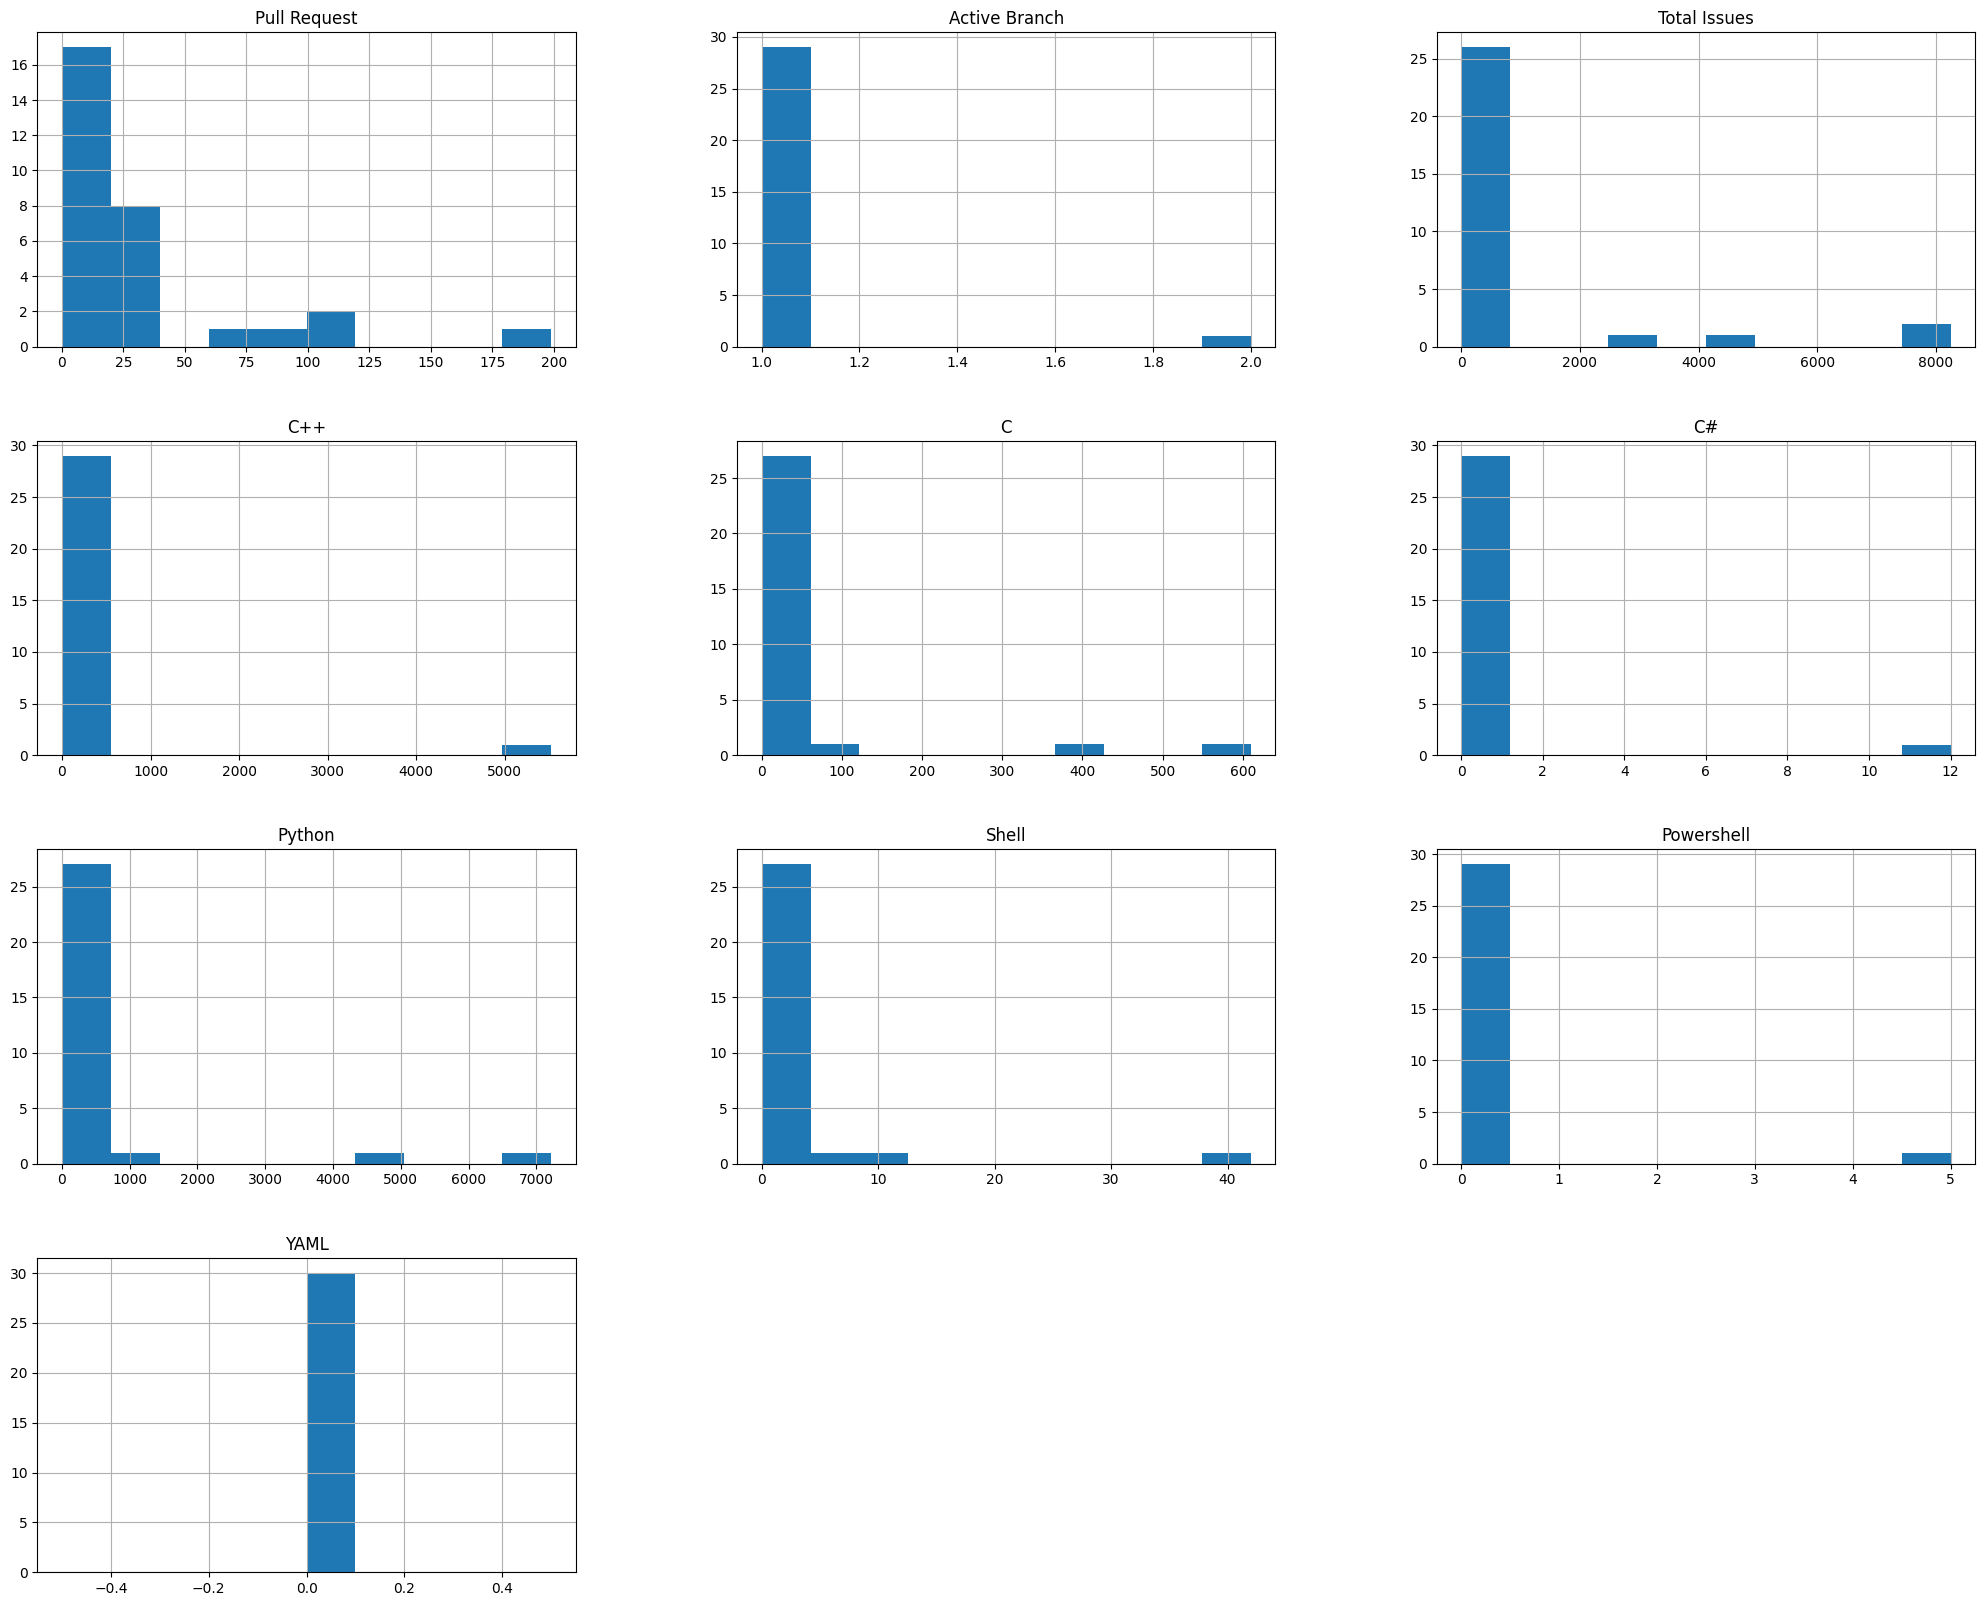

In [98]:
selected_columns = df.iloc[:, :10]

# selected_columns = df_dw.iloc[:, :-2]
selected_columns.hist(bins=10, linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(25,20)
plt.show()

### Splitting The Data into Training And Testing Dataset

In [99]:
# retrieve numpy array
dataset = df.values
# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]

# Normalisasi
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

###Feature Selection

In [100]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
k_best = 10  # Choose the number of top features to select

#### ANOVA F-test Features

Number of selected features ANOVA: 10
Selected features ANOVA : ['Total Issues', 'Powershell', 'Javascript', 'Swift', 'JS', 'CSS.1', 'Complexcity', 'Maintainability', 'Security', 'Style']


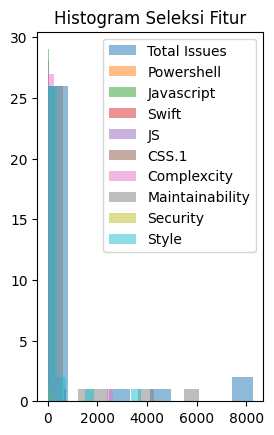

In [101]:
# Create SelectKBest object using chi2 as the score function
best_features_anova = SelectKBest(score_func=f_classif, k=k_best).fit(X_train, y_train)
selected_features_indices = best_features_anova.get_support(indices=True)

# Get the selected column names
selected_column_names = [df.columns[i] for i in selected_features_indices]

print(f"Number of selected features ANOVA: {len(selected_column_names)}")
print(f"Selected features ANOVA : {list(selected_column_names)}")

plt.subplot(1, 2, 2)
for feature in selected_column_names:
    plt.hist(df[feature], bins=10, alpha=0.5, label=feature)
    plt.title('Histogram Seleksi Fitur')
    plt.legend()

plt.show()

In [102]:
X_train_selected_anova = best_features_anova.transform(X_train)
X_test_selected_anova = best_features_anova.transform(X_test)

In [103]:
# Display the shape of the dataset before and after feature selection
print("Shape of original dataset:", X_train.shape)
print("Shape after feature selection:", X_train_selected_anova.shape)

Shape of original dataset: (24, 28)
Shape after feature selection: (24, 10)


In [104]:
df.columns

Index(['Pull Request', 'Active Branch', 'Total Issues', 'C++', 'C', 'C#',
       'Python', 'Shell', 'Powershell', 'YAML', 'R', 'CSS', 'Dockerfile',
       'PHP', 'Javascript', 'Java', 'Kotlin', 'Swift', 'JS', 'CSS.1', 'HTML',
       'Ruby', 'Go', 'Complexcity', 'Performance', 'Maintainability',
       'Security', 'Style', 'Code Style Rank'],
      dtype='object')

#### Univariate Selection

Number of selected features univariate: 10
Selected features univariate : ['Total Issues', 'C++', 'C#', 'Powershell', 'Javascript', 'Swift', 'JS', 'CSS.1', 'Security', 'Style']


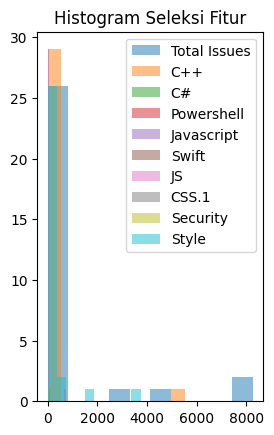

In [105]:
# Create SelectKBest object using chi2 as the score function
best_features_univariate = SelectKBest(score_func=chi2, k=k_best).fit(X_train, y_train)
selected_features_indices = best_features_univariate.get_support(indices=True)

# Get the selected column names
selected_column_names = [df.columns[i] for i in selected_features_indices]

print(f"Number of selected features univariate: {len(selected_column_names)}")
print(f"Selected features univariate : {list(selected_column_names)}")

plt.subplot(1, 2, 2)
for feature in selected_column_names:
    plt.hist(df[feature], bins=10, alpha=0.5, label=feature)
    plt.title('Histogram Seleksi Fitur')
    plt.legend()

plt.show()

In [106]:
X_train_selected_univariate = best_features_univariate.transform(X_train)
X_test_selected_univariate = best_features_univariate.transform(X_test)

#### Recursive Feature Elimination

Number of selected features RFE: 10
Selected features RFE : ['Active Branch', 'Total Issues', 'C++', 'C', 'Shell', 'CSS', 'JS', 'Complexcity', 'Security', 'Style']


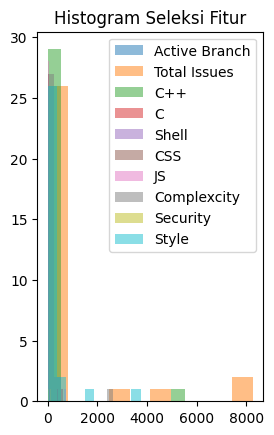

In [107]:
# Inisialisasi RFE dengan model dan jumlah fitur yang diinginkan
best_features_rfe = RFE(RandomForestClassifier(n_estimators=5, random_state=42), n_features_to_select=k_best, step=50)  # Sesuaikan parameter
best_features_rfe.fit(X_train, y_train)
selected_features_indices = best_features_rfe.get_support(indices=True)

# Get the selected column names
selected_column_names = [df.columns[i] for i in selected_features_indices]

print(f"Number of selected features RFE: {len(selected_column_names)}")
print(f"Selected features RFE : {list(selected_column_names)}")

plt.subplot(1, 2, 2)
for feature in selected_column_names:
    plt.hist(df[feature], bins=10, alpha=0.5, label=feature)
    plt.title('Histogram Seleksi Fitur')
    plt.legend()

plt.show()

In [108]:
X_train_selected_rfe = best_features_rfe.transform(X_train)
X_test_selected_rfe = best_features_rfe.transform(X_test)

### Dimensionality Reduction

In [109]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#### Principal Component Analysis - PCA

In [110]:
# Dimensionality Reduction with PCA for all feature
print("Dimensionality Reduction with PCA for all feature")
n_components = 5
pca = PCA(n_components=n_components)
X_train_reduced_pca = pca.fit_transform(X_train)
X_test_reduced_pca = pca.transform(X_test)

Dimensionality Reduction with PCA for all feature


#### Linear Discriminant Analysis - LDA

In [111]:
# Dimensionality Reduction with LDA for all feature
print("Dimensionality Reduction with LDA for all feature")
n_components = 1
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_train_reduced_lda = lda.fit_transform(X_train, y_train)
X_test_reduced_lda = lda.transform(X_test)

Dimensionality Reduction with LDA for all feature


### Uji metode tersebut dengan sedikitnya 5 Klasifikasi

In [112]:
# evaluation of a model using 4 features chosen with anova f-test
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # for checking the model accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn import model_selection
# Define stratified k-fold cross-validation with 10 splits
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
scoring = 'accuracy'

In [113]:
results_df = pd.DataFrame(columns=['Algorithm', 'Accuracy'])

In [114]:
def update_results(algorithm, accuracy):
    global results_df

    # Mencari baris yang sesuai dengan algoritma
    mask = (results_df['Algorithm'] == algorithm)

    # Jika algoritma sudah ada, update nilai
    if mask.any():
        results_df.loc[mask, 'Accuracy'] = accuracy
    # Jika algoritma belum ada, tambahkan baris baru
    else:
        results_df = pd.concat([results_df, pd.DataFrame({'Algorithm': [algorithm],
                                                          'Accuracy': [accuracy]})],
                               ignore_index=True)


####Logistic Regresion

In [115]:
# fit the model with all feature
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 83.33


In [116]:
update_results("Logistic Regresion", accuracy*100)
print(results_df)

            Algorithm   Accuracy
0  Logistic Regresion  83.333333


####Decision Tree

In [117]:
# fit the model with all feature
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 100.00


In [118]:
update_results("Decision Tree", accuracy*100)
print(results_df)

            Algorithm    Accuracy
0  Logistic Regresion   83.333333
1       Decision Tree  100.000000


####Support Vector Machine

In [119]:
# fit the model with all feature
model = SVC()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 83.33


In [120]:
update_results("Support Vector Machine", accuracy*100)
print(results_df)

                Algorithm    Accuracy
0      Logistic Regresion   83.333333
1           Decision Tree  100.000000
2  Support Vector Machine   83.333333


####K-Nearest Neighbors

In [121]:
# fit the model with all feature
model = KNeighborsClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 83.33


In [122]:
update_results("K-Nearest Neighbors", accuracy*100)
print(results_df)

                Algorithm    Accuracy
0      Logistic Regresion   83.333333
1           Decision Tree  100.000000
2  Support Vector Machine   83.333333
3     K-Nearest Neighbors   83.333333


####Random Forest

In [123]:
# fit the model with all feature
model = RandomForestClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 83.33


In [124]:
update_results("Random Forest", accuracy*100)
print(results_df)

                Algorithm    Accuracy
0      Logistic Regresion   83.333333
1           Decision Tree  100.000000
2  Support Vector Machine   83.333333
3     K-Nearest Neighbors   83.333333
4           Random Forest   83.333333


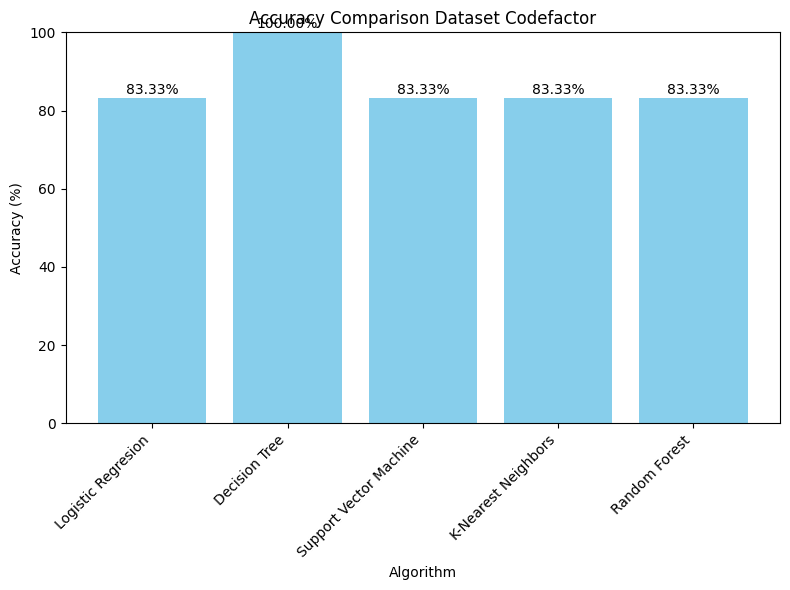

In [126]:
import matplotlib.pyplot as plt

# Ambil data dari DataFrame
algorithm = results_df['Algorithm']
accuracy = results_df['Accuracy']

# Plot
plt.figure(figsize=(8, 6))
plt.bar(algorithm, accuracy, color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison Dataset Codefactor')
plt.ylim(0, 100)

# Menampilkan nilai di atas tiap bar
for i in range(len(algorithm)):
    plt.text(i, accuracy[i] + 1, f'{accuracy[i]:.2f}%', ha='center')

# Menampilkan grafik
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
